In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data_collection/data.csv")

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,count
0,2003-12-01,0.83724,0.83056,0.83098,0.83577,0.0,0.83577,0.0
1,2003-12-02,0.83710,0.82583,0.83605,0.82720,0.0,0.82720,0.0
2,2003-12-03,0.82802,0.82440,0.82713,0.82488,0.0,0.82488,0.0
3,2003-12-04,0.83029,0.82345,0.82508,0.82775,0.0,0.82775,1.0
4,2003-12-05,0.82878,0.82028,0.82795,0.82055,0.0,0.82055,1.0


In [4]:
df.drop("Volume",1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4662 non-null   object 
 1   High       4662 non-null   float64
 2   Low        4662 non-null   float64
 3   Open       4662 non-null   float64
 4   Close      4662 non-null   float64
 5   Adj Close  4662 non-null   float64
 6   count      4662 non-null   float64
dtypes: float64(6), object(1)
memory usage: 255.1+ KB


In [6]:
import matplotlib.pyplot as plt

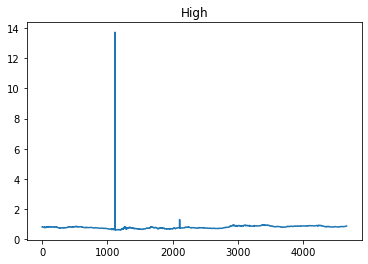

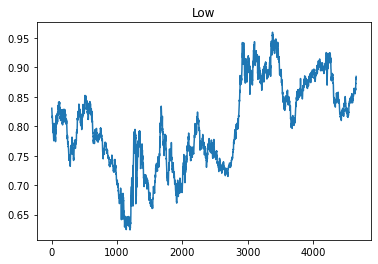

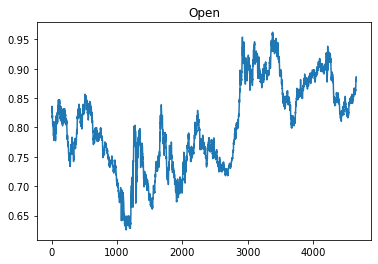

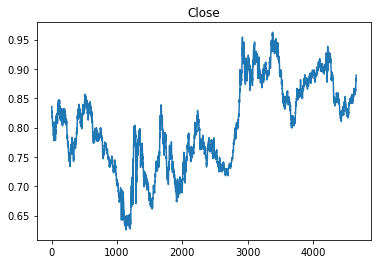

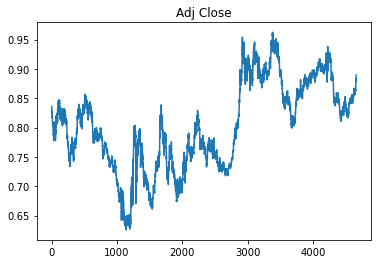

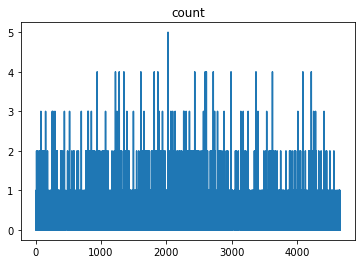

In [7]:
for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()

In [8]:
df.drop(df[df.High > 1].index, inplace=True)

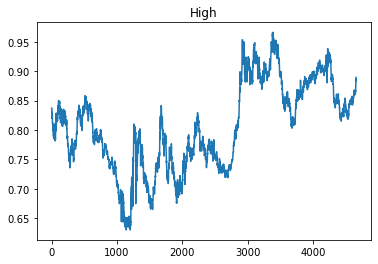

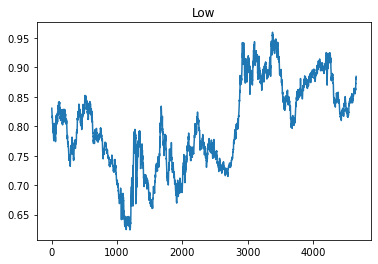

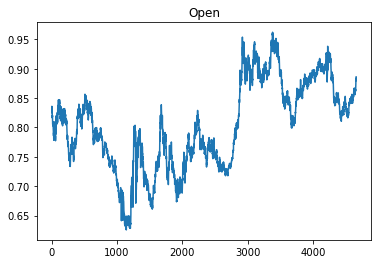

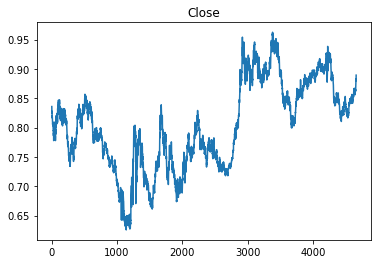

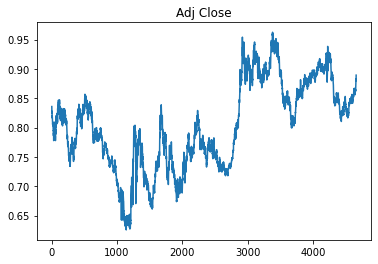

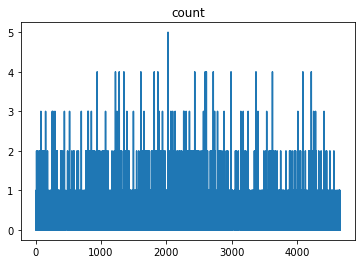

In [9]:
for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()

In [10]:
df[["Close","Adj Close"]].apply(lambda x: x.Close-x["Adj Close"],1).value_counts()

0.0    4660
dtype: int64

In [11]:
pd.concat([df[df["count"] > 0].mean(), df[df["count"] < 1].mean()], 1).rename(columns={0:"daywtihexplanation", 1:"daywithoutexplanation"})

,daywtihexplanation,daywithoutexplanation
High,0.800340,0.807893
Low,0.793938,0.802089
Open,0.797151,0.804968
Close,0.797126,0.804952
Adj Close,0.797126,0.804952
count,1.301786,0.000000


### Univariate Analysis

In [11]:
dfm = df[["Date","Close"]]

In [12]:
dfm.head()

,Date,Close
0,2003-12-01,0.83577
1,2003-12-02,0.82720
2,2003-12-03,0.82488
3,2003-12-04,0.82775
4,2003-12-05,0.82055


In [13]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4660 entries, 0 to 4661
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4660 non-null   object 
 1   Close   4660 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB


In [14]:
dfm.Date = pd.to_datetime(dfm.Date,)
dfm.set_index("Date", drop= "Date", inplace=True)
dfm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4660 entries, 2003-12-01 to 2021-11-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4660 non-null   float64
dtypes: float64(1)
memory usage: 72.8 KB


C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
dfm.index

DatetimeIndex(['2003-12-01', '2003-12-02', '2003-12-03', '2003-12-04',
               '2003-12-05', '2003-12-08', '2003-12-09', '2003-12-10',
               '2003-12-11', '2003-12-12',
               ...
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18',
               '2021-11-19', '2021-11-22'],
              dtype='datetime64[ns]', name='Date', length=4660, freq=None)

In [16]:
dfi = pd.date_range("2003-12-01", "2021-11-12",freq="B", name="Date").to_frame()
dfi= dfi.drop("Date",1)
df2 = pd.merge(dfi, dfm, how="left", on="Date" ).fillna(method="bfill")
df2

,Close
Date,
2003-12-01,0.83577
2003-12-02,0.82720
2003-12-03,0.82488
2003-12-04,0.82775
2003-12-05,0.82055
...,...
2021-11-08,0.86439
2021-11-09,0.86270
2021-11-10,0.86240


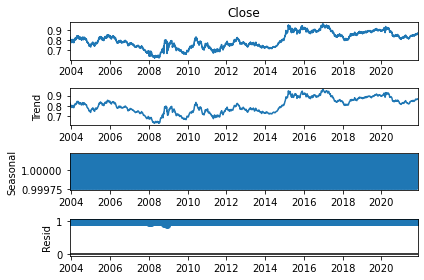

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Close'], model='multiplicative') 
result.plot();

<AxesSubplot:xlabel='Date'>

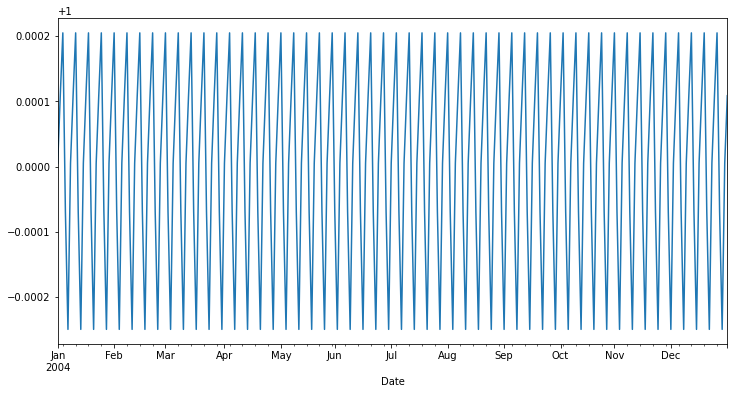

In [19]:
result.seasonal.loc["2004-01-01":"2004-12-31"].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

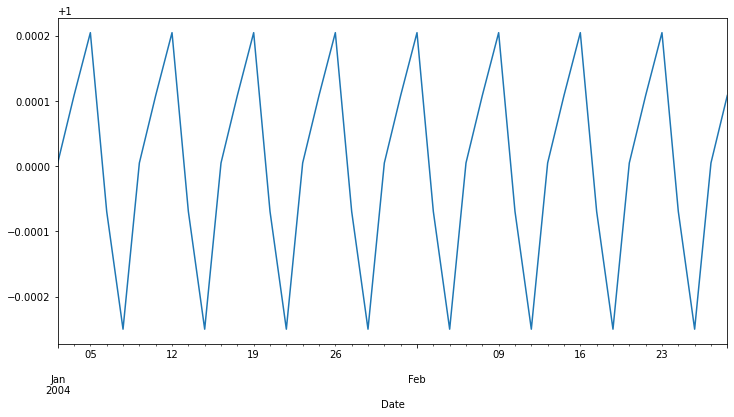

In [20]:
result.seasonal.loc["2004-01-01":"2004-02-28"].plot(figsize=(12,6))

In [21]:
df.Date.apply(lambda x: x.split("-")[0]).value_counts()

2020    262
2010    261
2016    261
2015    261
2018    261
2009    261
2014    261
2004    261
2019    260
2013    260
2011    260
2006    260
2012    259
2005    259
2017    258
2007    258
2008    242
2021    232
2003     23
Name: Date, dtype: int64

In [22]:
df.Date.apply(lambda x: x.split("-")[1]).value_counts()

03    411
05    398
01    397
12    397
07    395
08    385
06    385
04    384
09    384
10    382
11    379
02    363
Name: Date, dtype: int64

In [23]:
df.Date.apply(lambda x: x.split("-")[2]).value_counts()

02    156
05    156
12    156
19    156
16    155
23    155
09    155
26    155
15    154
11    154
22    154
08    154
25    154
01    154
04    153
18    153
28    152
03    152
27    152
13    152
06    152
17    151
20    151
14    151
07    151
10    151
24    151
21    150
29    144
30    139
31     87
Name: Date, dtype: int64

In [20]:
traind_date = df2[["Close"]].iloc[:-20]
test_date = df2[["Close"]].iloc[-20:]

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:


model = ExponentialSmoothing(traind_date['Close'],trend='add',seasonal='add',seasonal_periods=23).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [26]:
pre = model.forecast(20)

<AxesSubplot:xlabel='Date'>

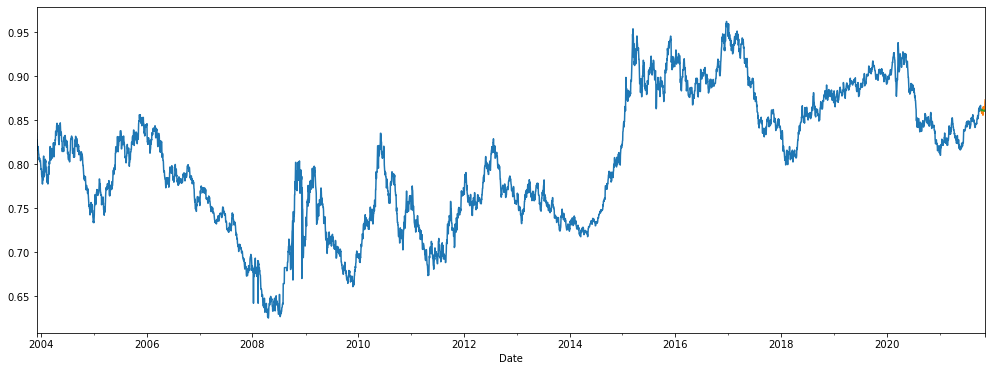

In [27]:
traind_date["Close"].plot()
test_date.Close.plot(figsize=(17,6))
pre.plot()

<AxesSubplot:xlabel='Date'>

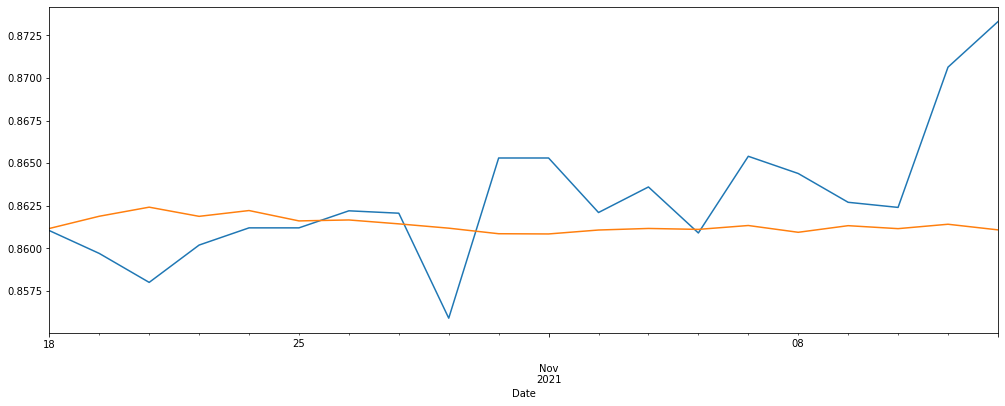

In [28]:
test_date.Close.plot(figsize=(17,6))
pre.plot()

In [18]:
from statsmodels.tools.eval_measures import rmse

In [30]:


error1 = rmse(test_date['Close'], pre)

print(f'RMSE Error: {error1}')

RMSE Error: 0.004298907130189544


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


RMSE Error: 0.005206687376592321


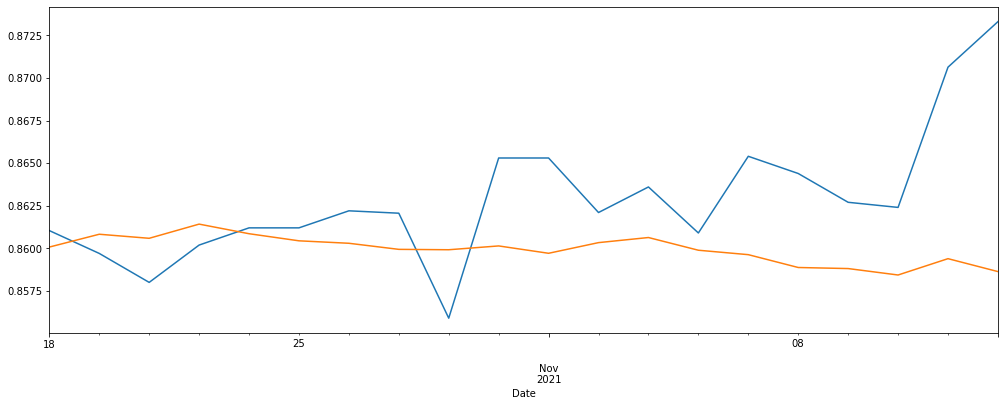

In [32]:
model = ExponentialSmoothing(traind_date['Close'],trend='add',seasonal='add',seasonal_periods=69).fit()
pre = model.forecast(20)
#traind_date["Close"].plot()
test_date.Close.plot(figsize=(17,6))
pre.plot()
error1 = rmse(test_date['Close'], pre)
print(f'RMSE Error: {error1}')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


 RMSE Error: 0.003644532284646912


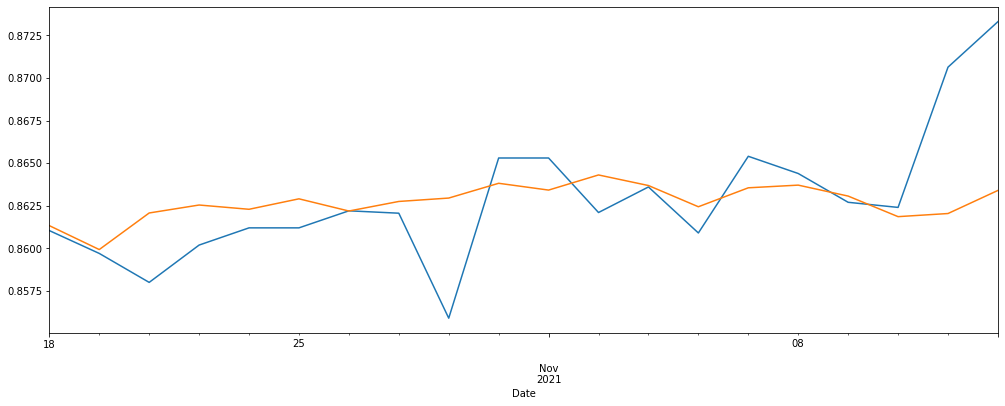

In [35]:
model = ExponentialSmoothing(traind_date['Close'],trend='add',seasonal='add',seasonal_periods=100).fit()
pre = model.forecast(20)
#traind_date["Close"].plot()
test_date.Close.plot(figsize=(17,6))
pre.plot()
error1 = rmse(test_date['Close'], pre)
print(f" RMSE Error: {error1}")

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 RMSE Error: 0.003358626531201934


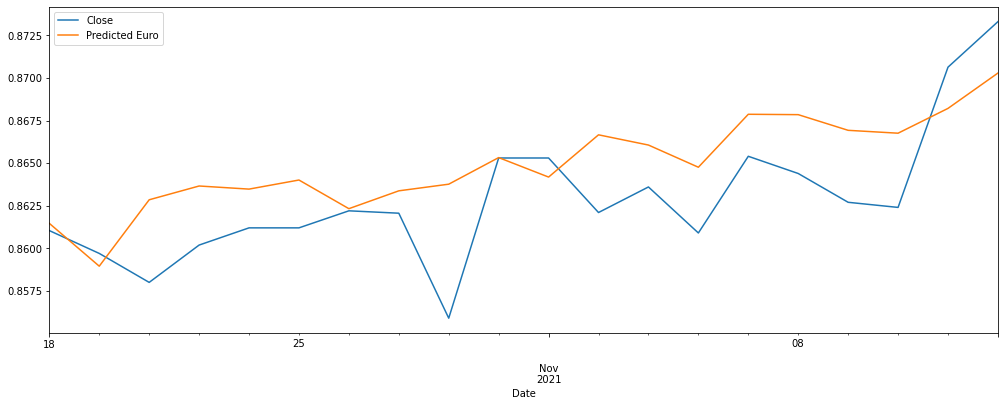

In [23]:
model = ExponentialSmoothing(traind_date['Close'],trend='add',seasonal='add',seasonal_periods=200).fit()
pre = model.forecast(20)
#traind_date["Close"].plot()
test_date.Close.plot(figsize=(17,6))
pre.plot()
plt.legend(["Close", "Predicted Euro"])
error1 = rmse(test_date['Close'], pre)
print(f' RMSE Error: {error1}')

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 RMSE Error: 0.006183822789261207


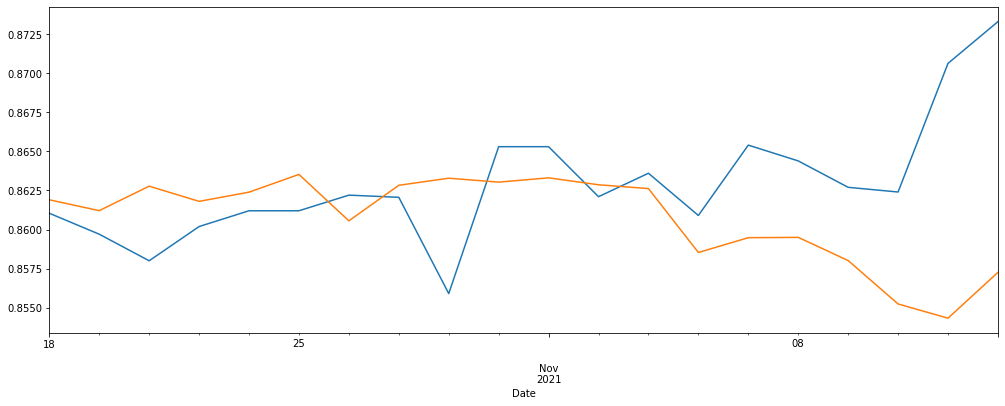

In [37]:
model = ExponentialSmoothing(traind_date['Close'],trend='add',seasonal='add',seasonal_periods=300).fit()
pre = model.forecast(20)
#traind_date["Close"].plot()
test_date.Close.plot(figsize=(17,6))
pre.plot()
error1 = rmse(test_date['Close'], pre)
print(f' RMSE Error: {error1}')

In [38]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [39]:
adf_test(df2.Close)

Augmented Dickey-Fuller Test: 
ADF test statistic        -1.947214
p-value                    0.310186
# lags used                2.000000
# observations          4682.000000
critical value (1%)       -3.431747
critical value (5%)       -2.862158
critical value (10%)      -2.567099
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary
